In [1]:
from os.path import isfile, join
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import scipy
from bispectrumcode.python.cjh_tests.bispectrum import bispectrum_2d
from analysis.utils.image_bispectrum import *
from analysis.utils.visualization import *
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import cKDTree
%load_ext autoreload
%autoreload 2

/home/sanborn/software/anaconda3/envs/bs/lib/python2.7/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


# Utils

In [2]:
def get_spectra(stim):
    m, n = stim.shape[1], stim.shape[2]
    fft = np.fft.fftshift(np.fft.fft2(stim))
    B = bispectrum_2d(fft, m, n)
    ps = fft * np.conj(fft)
    return B, ps

In [3]:
data_dir = '/home/sanborn/datasets/shapes/'

In [4]:
shapes_neurons = np.load(data_dir+"shapes_neurons.npy")
shapes = np.load(data_dir+"shapes.npy")

In [5]:
B, ps = get_spectra(shapes)

In [73]:
def normalize_rc(rc, responses):
    return np.sum(np.array(rc), axis=0) / np.sum(responses)

def nearest_neighbor(point, set_of_points):
    smallest_distance = np.inf
    for i, p in enumerate(set_of_points):
        dist = np.mean((point - p) ** 2)
        if dist < smallest_distance:
            smallest_distance = dist
            closest_point = i
    return closest_point

def rev_corr_nn(neurons, stim, power_spectrum, bispectrum, k=1):
    bs_neighbors = []
    ps_neighbors = []
    pixel_neighbors = []
    for j, n in enumerate(neurons):
        print(j)
        bs_revcorr = []
        pixel_revcorr = []
        ps_revcorr = []
        responses = []
        for i, response in enumerate(n):
            if response >= .5 * np.max(n):
                ps_revcorr.append(power_spectrum[i] * response)
                bs_revcorr.append(bispectrum[i] * response)
                pixel_revcorr.append(stim[i] * response)
                responses.append(response)
        bs_revcorr = normalize_rc(bs_revcorr, responses)
        ps_revcorr = normalize_rc(ps_revcorr, responses)
        pixel_revcorr = normalize_rc(pixel_revcorr, responses)
        bs_neighbors.append(nearest_neighbor(bs_revcorr, bispectrum))
        pixel_neighbors.append(nearest_neighbor(pixel_revcorr, stim))
        ps_neighbors.append(nearest_neighbor(ps_revcorr, power_spectrum))
    return pixel_neighbors, ps_neighbors, bs_neighbors, pixel_revcorr, ps_revcorr, bs_revcorr

In [74]:
pixel_neighbors, ps_neighbors, bs_neighbors, pixel_revcor, ps_revcorr, bs_revcorr = rev_corr_nn(shapes_neurons[:3], shapes[:, 70:90, 70:90], ps, B)

0
1
2


In [75]:
ps_neighbors

[4721, 2171, 4393]

In [76]:
pixel_neighbors

[759, 381, 8019]

In [77]:
bs_neighbors

[6180, 6180, 6180]

In [68]:
x = nearest_neighbor(bs_revcorr, B)

In [82]:
np.mean((bs_revcorr - B[1] ** 2)) < np.mean((bs_revcorr - B[6180] ** 2))

True

In [78]:
np.mean((bs_revcorr - B[6180] ** 2))

(8.4843909181121352e+18+4.0493273477352006e+17j)

In [70]:
B[x]

array([  1.07619722e-41 -3.58732407e-42j,
         1.07288094e-41 -3.57626981e-42j,
         1.06626628e-41 -3.55422092e-42j, ...,
        -7.95461186e+05 +2.55296860e+05j,
        -7.95461186e+05 +2.55296860e+05j,  -7.95461186e+05 +2.55296860e+05j])

threshold: 0.459190387551
max_stim: 9425   response: 0.918380775101
26
26


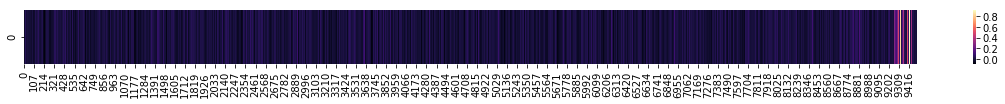

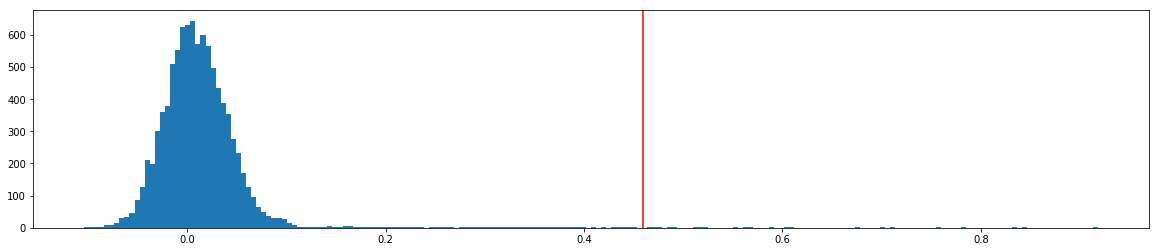

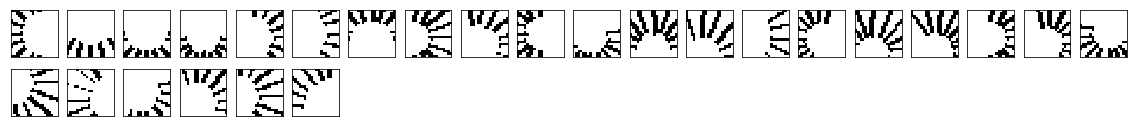

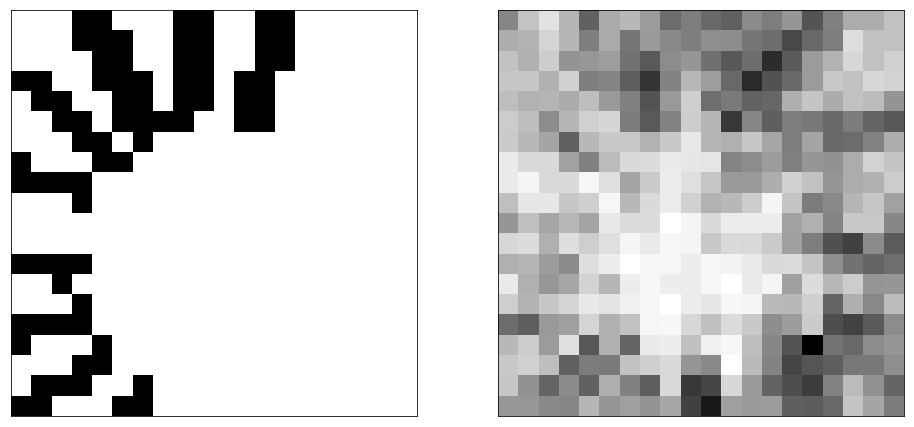

In [64]:
bs, ffts = plot_neuron(shapes_neurons, shapes[:, 70:90, 70:90], 0, n_stds=10, white=False, crop=False)

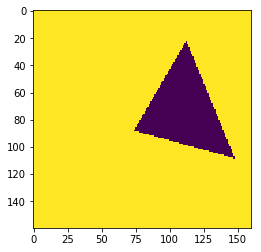

In [45]:
plt.imshow(shapes[2569])

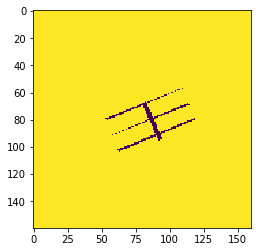

In [42]:
plt.imshow(shapes[7217])

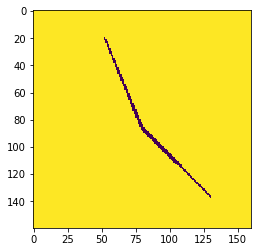

In [41]:
plt.imshow(shapes[6239])